In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import APIFetcher as API
import asyncio
plt.rcParams.update({
    'axes.facecolor': '#2E2E2E',
    'figure.facecolor': '#1E1E1E',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#444444',
    'axes.edgecolor': 'white'
})

In [ ]:
#numberss
n=100
snapfifty = API.fetch_historical_5m(n)

c:\Users\Mstav\GrandExchange\APIFetcher.py:83: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_t], ignore_index=True)


In [9]:
#grab ID's with rows with NaN values == TRUE
NAindex=snapfifty[snapfifty.isna().any(axis=1)]['index'].unique()
snapfiftyprune = snapfifty[~snapfifty["index"].isin(NAindex)]
#removing low volume items
snapfiftyprunegroup= snapfiftyprune.groupby('index').nunique()
#n-1 to ensure proper ranging
filtered_indexes = snapfiftyprunegroup[snapfiftyprunegroup['timestamp'] != n-1].index
snapfiftyprune=snapfiftyprune[~snapfiftyprune['index'].isin(filtered_indexes)]
#rechecking groupings for n timestamps
snapfiftyprunegroup= snapfiftyprune.groupby('index').nunique()
#Weighted average of High/Low Price by High/Low Volume
snapfiftyprune['totalvol']=snapfiftyprune['highPriceVolume']+snapfiftyprune['lowPriceVolume']
snapfiftyprune['wprice']=(snapfiftyprune['highPriceVolume']/snapfiftyprune['totalvol'])*(snapfiftyprune['avgHighPrice']-snapfiftyprune['avgLowPrice'])+snapfiftyprune['avgLowPrice']
#transforming panel data to price and volume matrices
price_matrix_snapfifty=snapfiftyprune.pivot(index="timestamp", columns="index", values="wprice")
vol_matrix_snapfifty=snapfiftyprune.pivot(index='timestamp', columns='index', values='totalvol')
corr_price_snapfifty=price_matrix_snapfifty.corr()
corr_vol_snapfifty=vol_matrix_snapfifty.corr()


In [16]:
#volatility
volatilityitems = price_matrix_snapfifty.rolling(window=4).std()
volatilitymarket= volatilityitems.sum(axis=1)
#Dividing by shape as count of row/column length
volatilitymarket=volatilitymarket/price_matrix_snapfifty.shape[1]
volatilitymarket

timestamp
1746882300    0.000000
1746882600    0.000000
1746882900    0.000000
1746883200    5.662562
1746883500    6.031313
                ...   
1746910500    8.368292
1746910800    3.716138
1746911100    4.668525
1746911400    8.324793
1746911700    9.416657
Length: 99, dtype: float64

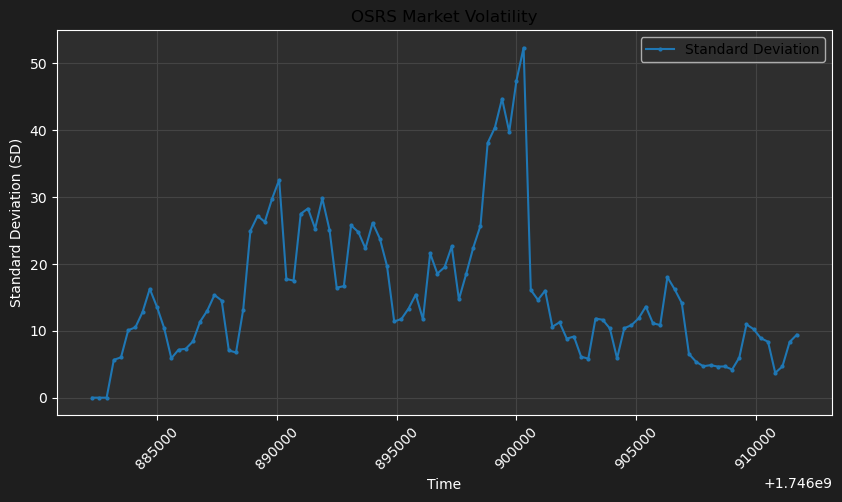

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(volatilitymarket, marker="o", markersize='2', linestyle="-", label="Standard Deviation")

plt.xlabel("Time")
plt.ylabel("Standard Deviation (SD)")
plt.title("OSRS Market Volatility")
plt.legend()
plt.xticks(rotation=45)  # Rotate timestamps for clarity
plt.grid()

# Show the plot
plt.show()

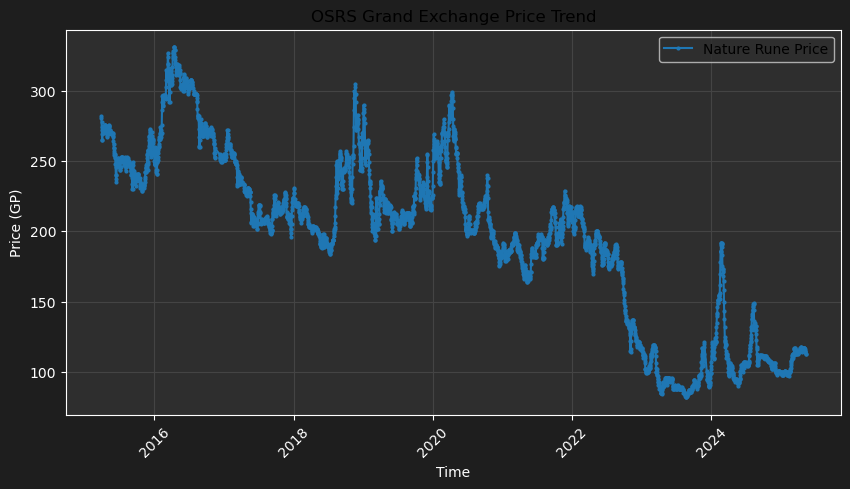

In [ ]:
nature = API.fetch_historical(561)
plt.figure(figsize=(10, 5))
plt.plot(nature['timestamp'], nature['price'], marker="o", markersize='2', linestyle="-", label="Nature Rune Price")

plt.xlabel("Time")
plt.ylabel("Price (GP)")
plt.title("OSRS Grand Exchange Price Trend")
plt.legend()
plt.xticks(rotation=45)  # Rotate timestamps for clarity
plt.grid()

# Show the plot
plt.show()
